In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import duckdb as dd
import polars as pl
import os
import glob
import shutil
import zipfile
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import librosa
from IPython.display import Audio
import pickle
from joblib import dump, load
from pathlib import Path
from datetime import datetime
from tqdm import tqdm

In [5]:
# !pip download scikit-maad==1.4.1 -d /kaggle/working/mysitepackages/sklearn_maad_pkg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 69.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 75.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 73.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 37.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 85.5 MB/s eta

In [25]:
#!pip download ffmpeg-python==0.2.0 -d /kaggle/working/mysitepackages/ffmpeg_pkg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 8.2 MB/s eta 0:00:00a 0:00:01
Saved ./ffmpeg_python-0.2.0-py3-none-any.whl
Saved ./future-1.0.0-py3-none-any.whl
Successfully downloaded ffmpeg-python future


In [29]:
"""from zipfile import ZipFile
import os

dirName = '/kaggle/working/mysitepackages'
zipName = 'ffmpeg_pkg.zip'

# Create a ZipFile Object
with ZipFile(zipName, 'w') as zipObj:
    # Iterate over all the files in directory
    for folderName, subfolders, filenames in os.walk(dirName):
        for filename in filenames:
            if (filename != zipName):
                # create complete filepath of file in directory
                filePath = os.path.join(folderName, filename)
                # Add file to zip
                zipObj.write(filePath)"""

In [1]:
#!pip install ffmpeg-python --no-index --find-links=file:///kaggle/input/ffmpeg-pkg/kaggle/working

Looking in links: file:///kaggle/input/ffmpeg-pkg/kaggle/working
Processing /kaggle/input/ffmpeg-pkg/kaggle/working/ffmpeg_python-0.2.0-py3-none-any.whl


In [2]:
#!pip install scikit-maad --no-index --find-links=file:///kaggle/input/sklearn-maad-offline/kaggle/working/mysitepackages/sklearn_maad_pkg

Looking in links: file:///kaggle/input/sklearn-maad-offline/kaggle/working/mysitepackages/sklearn_maad_pkg
Processing /kaggle/input/sklearn-maad-offline/kaggle/working/mysitepackages/sklearn_maad_pkg/scikit_maad-1.4.1-py3-none-any.whl
Processing /kaggle/input/sklearn-maad-offline/kaggle/working/mysitepackages/sklearn_maad_pkg/resampy-0.4.3-py3-none-any.whl (from scikit-maad)


In [3]:
"""from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from maad import sound, rois, features
from maad.util import (
   power2dB, plot2d, format_features, read_audacity_annot,
   overlay_rois, overlay_centroid
   )"""

In [2]:
def extract_features_wo_offset(file_path):
    # Load audio file
    audio, sample_rate = librosa.load(path=file_path, sr=32000)
    # Extract features using Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Flatten the features into a 1D array
    flattened_features = np.mean(mfccs.T, axis=0)
    return flattened_features

def audio_classification_wo_offset(file_path):
    extracted_features = extract_features_wo_offset(file_path).reshape(1, -1)
    y_predict = random_forest_model.predict_proba(extracted_features)
    
    return y_predict

In [2]:
audio_duration = 5

# Function to extract features from audio file
def extract_features(file_path, offset=0.0, duration=5.0):
    # Load audio file
    audio, sample_rate = librosa.load(path=file_path, sr=32000, offset=offset, duration=duration)
    # Extract features using Mel-Frequency Cepstral Coefficients (MFCC)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # Flatten the features into a 1D array
    flattened_features = np.mean(mfccs.T, axis=0)
    return flattened_features

In [3]:
def audio_classification(file_path, offset=0.0, duration=5.0):
    extracted_features = extract_features(file_path, offset=offset, duration=duration).reshape(1, -1)
    y_predict = random_forest_model.predict_proba(extracted_features)
    
    return y_predict

In [4]:
random_forest_model = load('/kaggle/input/trained-audio-model-v-01/audio_classifier_model.joblib')

In [5]:
meta_data = pl.read_csv('../input/birdclef-2024/train_metadata.csv', low_memory=True)

In [6]:
bird_cols = list(meta_data['primary_label'].unique().sort())

In [7]:
test_soundscapes = '/kaggle/input/birdclef-2024/unlabeled_soundscapes'
# test_soundscapes = '/kaggle/input/birdclef-2024/test_soundscapes'

filenames_with_path = glob.glob(f"{test_soundscapes}/*.ogg")
# filenames = [('soundscape_' + os.path.basename(filename)) for filename in filenames_with_path]
filenames = [os.path.basename(filename) for filename in filenames_with_path]

print(len(filenames))

8444


In [64]:
"""all_durations = []
for i in range(len(filenames_with_path)):
    audio, sample_rate = librosa.load(path=filenames_with_path[i])
    duration = len(audio) / sample_rate
    all_durations.append(round(duration))
    
print(len(all_durations))"""

KeyboardInterrupt: 

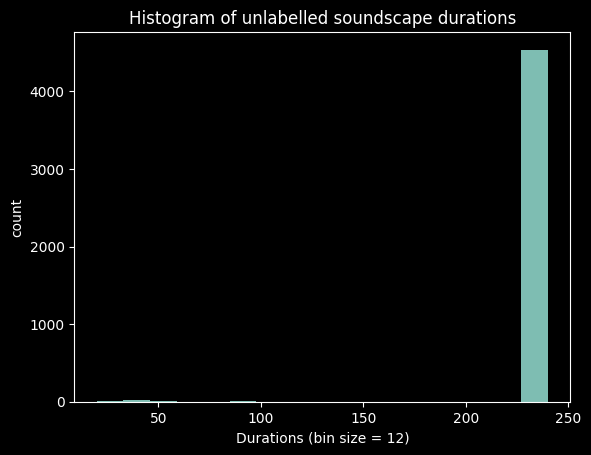

In [77]:
"""plt.hist(all_durations, bins=17, alpha=0.9)
plt.title('Histogram of unlabelled soundscape durations')
plt.xlabel('Durations (bin size = 12)')
plt.ylabel('count')

plt.show()"""

In [ ]:
"""duration = len(audio) / sample_rate
time = np.arange(0, duration, 1/sample_rate)
plt.figure(figsize=(30, 4))
plt.plot(time, audio, color='blue')
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plot = plt.show()"""

In [ ]:
"""n_fft = 500  # Number of FFT points 2048
hop_length = 50  # Hop length for STFT 512
stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
# Convert the magnitude spectrogram to decibels (log scale)
spectrogram = librosa.amplitude_to_db(np.abs(stft))
# Plot the spectrogram
plt.figure(figsize=(30, 6))
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plot = plt.show()"""

In [8]:
def audio_waveframe(file_path, offset=0.0, duration=5.0):
    # Load the audio file
    audio_data, sampling_rate = librosa.load(file_path, offset=offset, duration=duration)
    # Calculate the duration of the audio file
    duration = len(audio_data) / sampling_rate
    # Create a time array for plotting
    time = np.arange(0, duration, 1/sampling_rate)
    # Plot the waveform
    plt.figure(figsize=(30, 4))
    plt.plot(time, audio_data, color='blue')
    plt.title('Audio Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plot = plt.show()
    return plot

def spectrogram(file_path, offset=0.0, duration=5.0):
    # Compute the short-time Fourier transform (STFT)
    n_fft = 500  # Number of FFT points 2048
    hop_length = 50  # Hop length for STFT 512
    audio_data, sampling_rate = librosa.load(file_path, offset=offset, duration=duration)
    stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
    # Convert the magnitude spectrogram to decibels (log scale)
    spectrogram = librosa.amplitude_to_db(np.abs(stft))
    # Plot the spectrogram
    plt.figure(figsize=(30, 6))
    librosa.display.specshow(spectrogram, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plot = plt.show()
    return plot

def audio_analysis(file_path, offset=0.0, duration=5.0):
    aw = audio_waveframe(file_path, offset, duration)
    spg = spectrogram(file_path, offset, duration)
    return aw, spg

In [ ]:
"""test_soundscapes = '/kaggle/input/birdclef-2024/unlabeled_soundscapes/100350238.ogg'
for j in range(0,241,5):
    predicted = audio_classification(test_soundscapes, offset=float(j), duration=5.0)
    filename_noext = test_soundscapes.replace('.ogg','')
    df['row_id'] = f'{filename_noext}_{j}'
    df[bird_cols] = predicted
    submission_df = pd.concat([submission_df,df]).reset_index(drop=True)"""

In [9]:
sample_submit = pd.read_csv("/kaggle/input/birdclef-2024/sample_submission.csv")
submit = pd.DataFrame(columns=sample_submit.columns, dtype="object")

submit

,row_id,asbfly,ashdro1,ashpri1,ashwoo2,asikoe2,asiope1,aspfly1,aspswi1,barfly1,...,whbwoo2,whcbar1,whiter2,whrmun,whtkin2,woosan,wynlau1,yebbab1,yebbul3,zitcis1


In [10]:
convert_dict = {'row_id': str}
for bird in bird_cols:
    convert_dict[bird] = 'float'
    
submit = submit.astype(convert_dict)
print(submit.dtypes)

row_id      object
asbfly     float64
ashdro1    float64
ashpri1    float64
ashwoo2    float64
            ...   
woosan     float64
wynlau1    float64
yebbab1    float64
yebbul3    float64
zitcis1    float64
Length: 183, dtype: object


In [14]:
# 35
"""
processing of file 1193 finished in 9.747993 seconds
processing of file 1194 finished in 10.041723 seconds
processing of file 1195 finished in 10.080126 seconds
processing of file 1196 finished in 9.983381 seconds
processing of file 1197 finished in 9.980956 seconds
processing of file 1198 finished in 9.808822 seconds
processing of file 1199 finished in 9.896243 seconds
"""
"""print(filenames_with_path[122])
print(filenames[122])"""

/kaggle/input/birdclef-2024/unlabeled_soundscapes/1627554722.ogg
1627554722.ogg


In [18]:
#predicted = audio_classification('/kaggle/input/birdclef-2024/unlabeled_soundscapes/1627554722.ogg', offset=90.0, duration=5.0)

/tmp/ipykernel_33/1830216342.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(path=file_path, offset=offset, duration=duration)
/opt/conda/lib/python3.10/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=0
  warnings.warn(


In [27]:
#audio, sample_rate = librosa.load(path='/kaggle/input/birdclef-2024/unlabeled_soundscapes/1627554722.ogg', offset=85.0, duration=5.0)

In [32]:
audio, sample_rate = librosa.load(path='/kaggle/input/birdclef-2024/unlabeled_soundscapes/1627554722.ogg', sr=32000)

In [28]:
audio[12:17]

array([-0.00110212, -0.00223343, -0.0042419 , -0.00025267,  0.00344682],
      dtype=float32)

In [36]:
mfccs = librosa.feature.mfcc(y=audio, sr=32000, n_mfcc=40)
# Flatten the features into a 1D array
flattened_features = np.mean(mfccs.T, axis=0)

In [39]:
flattened_features.shape

(40,)

In [40]:
y_predict = random_forest_model.predict_proba(flattened_features.reshape(1, -1))

In [41]:
y_predict

array([[0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.01, 0.  , 0.  ,
        0.01, 0.  , 0.  , 0.  , 0.02, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.01, 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01,
        0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.01,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  ,
        0.  , 0.02, 0.  , 0.03, 0.  , 0.01, 0.  , 0.03, 0.  , 0.04, 0.01,
        0.  , 0.  , 0.01, 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.01, 0.01, 0.05, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01,
        0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.02, 0.  ,
        0.02, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
        0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.03, 0.  , 0.02,
        0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.01,
        0.01, 0.01, 0.  , 0.02, 0.01, 

In [92]:
#Audio(audio[6:11], rate=32000)

In [ ]:
#audio_analysis(file_path, offset=0.0, duration=5.0)

In [34]:
submission_df = pd.DataFrame(columns=sample_submit.columns)
print("submission file shape at start", submission_df.shape)
    
submission_df = submission_df.astype(convert_dict)
print(submission_df.dtypes)

submission file shape at start (0, 183)
row_id      object
asbfly     float64
ashdro1    float64
ashpri1    float64
ashwoo2    float64
            ...   
woosan     float64
wynlau1    float64
yebbab1    float64
yebbul3    float64
zitcis1    float64
Length: 183, dtype: object


In [43]:
test_files = filenames[0:1100]
len(test_files)

1100

In [ ]:
"""start = datetime.now()
print("inference started at : ", start)"""

chunk_dict = {}

for file in tqdm(test_files):
    full_path = '/kaggle/input/birdclef-2024/unlabeled_soundscapes/'+file
    audio, sample_rate = librosa.load(path=full_path, sr=32000)
    duration = round(len(audio) / sample_rate)
    for j in range(5,duration,5):
        cur_file = file.replace('.ogg','')
        chunk = cur_file+'_'+str(j)
        chunk_dict[chunk] = audio[j-5:j]

 82%|████████▏ | 899/1100 [04:36<01:14,  2.69it/s]

In [26]:
"""audio, sample_rate = librosa.load(path=filenames_with_path[122])
duration = round(len(audio) / sample_rate)

for j in range(5,duration,5):
    now = datetime.now()
    offset = j-5
    predicted = audio_classification(filenames_with_path[122], offset=float(offset), duration=5.0)
    filename_noext = filenames[122].replace('.ogg','')
    # print(f'{filename_noext}_{j}')
    submit['row_id'] = filename_noext+'_'+str(j)
    submit[bird_cols] = predicted.round(5)
    # print(submit['row_id'])
    submission_df = pd.concat([submission_df,submit], axis=0, join='inner').reset_index(drop=True)
    later = datetime.now()
    difference = (later - now).total_seconds()
        
    print("processing of chunk {0} finished in {1} seconds".format(str(j), difference))"""
    
end = datetime.now()
ended_in = (end - start).total_seconds()
print("inference finished in : ", ended_in)

inference started at :  2024-04-16 07:31:54.219601
processing of chunk 5 finished in 0.099534 seconds
processing of chunk 10 finished in 0.106701 seconds
processing of chunk 15 finished in 0.10641 seconds
processing of chunk 20 finished in 0.105717 seconds
processing of chunk 25 finished in 0.107771 seconds
processing of chunk 30 finished in 0.106154 seconds
processing of chunk 35 finished in 0.101537 seconds
inference finished in :  0.810719


In [35]:
# Test = True

"""start = datetime.now()
print("inference started at : ", start)
"""
for i in range(len(filenames_with_path)):
    audio, sample_rate = librosa.load(path=filenames_with_path[i], sr=32000)
    duration = round(len(audio) / sample_rate)
    
    # now = datetime.now()
    for j in range(5,duration,5):
        offset = j-5
        predicted = audio_classification(filenames_with_path[i], offset=float(offset), duration=5.0)
        filename_noext = filenames[i].replace('.ogg','')
        # print(f'{filename_noext}_{j}')
        submit['row_id'] = filename_noext+'_'+str(j)
        submit[bird_cols] = predicted.round(5)
        # print(submit['row_id'])
        submission_df = pd.concat([submission_df,submit]).reset_index(drop=True)
        """later = datetime.now()
        difference = (later - now).total_seconds()"""
        
    """print("processing of file {0} finished in {1} seconds".format(i, difference))
    
    if i == 1099:
        end = datetime.now()
        difference = (end - start).total_seconds()
        print("processing of 1100 files finished in {0} seconds".format(difference))
        print("submission file shape at end", submission_df.shape)
        break"""

In [ ]:
# submission_df.sum(axis=1, numeric_only=True)

In [27]:
#submission_df

,row_id,asbfly,ashdro1,ashpri1,ashwoo2,asikoe2,asiope1,aspfly1,aspswi1,barfly1,...,whbwoo2,whcbar1,whiter2,whrmun,whtkin2,woosan,wynlau1,yebbab1,yebbul3,zitcis1
0,1627554722_5,0.0,0.00,0.02,0.01,0.00,0.00,0.01,0.0,0.0,...,0.02,0.01,0.0,0.02,0.01,0.02,0.0,0.00,0.00,0.0
1,1627554722_10,0.0,0.01,0.01,0.00,0.01,0.00,0.00,0.0,0.0,...,0.03,0.02,0.0,0.01,0.01,0.03,0.0,0.00,0.01,0.0
2,1627554722_15,0.0,0.00,0.02,0.00,0.01,0.01,0.00,0.0,0.0,...,0.03,0.02,0.0,0.02,0.01,0.03,0.0,0.00,0.01,0.0
3,1627554722_20,0.0,0.01,0.00,0.00,0.01,0.00,0.00,0.0,0.0,...,0.01,0.02,0.0,0.00,0.01,0.02,0.0,0.00,0.00,0.0
4,1627554722_25,0.0,0.00,0.01,0.00,0.01,0.01,0.00,0.0,0.0,...,0.03,0.02,0.0,0.03,0.01,0.04,0.0,0.00,0.00,0.0
5,1627554722_30,0.0,0.00,0.00,0.01,0.01,0.00,0.01,0.0,0.0,...,0.02,0.00,0.0,0.02,0.02,0.03,0.0,0.00,0.01,0.0
6,1627554722_35,0.0,0.01,0.00,0.00,0.01,0.01,0.00,0.0,0.0,...,0.03,0.02,0.0,0.01,0.01,0.02,0.0,0.01,0.00,0.0


In [36]:
sample_submission = pd.read_csv("/kaggle/input/birdclef-2024/sample_submission.csv")
assert set(sample_submission.columns) == set(submission_df.columns)
#submission_df = submission_df[sample_submission.columns]

In [ ]:
submission_df.to_csv('submission.csv', index=False)